<a href="https://colab.research.google.com/github/pandu1992/PraktikumDataScience/blob/main/DANAxBINUS_University.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

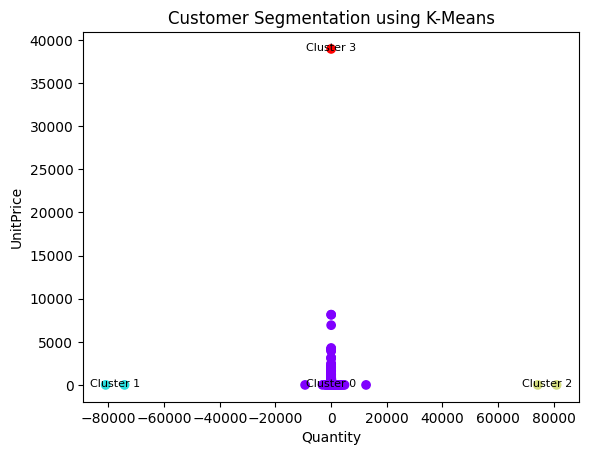

In [8]:
from IPython import get_ipython
from IPython.display import display
# %%
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
url = "https://github.com/databricks/Spark-The-Definitive-Guide/blob/master/data/retail-data/all/online-retail-dataset.csv?raw=true"
data = pd.read_csv(url)

# Preprocess data
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.dropna(subset=['CustomerID'], inplace=True)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data[['Quantity', 'UnitPrice']])

# Visualize the clusters with improved labels
plt.scatter(data['Quantity'], data['UnitPrice'], c=data['Cluster'], cmap='rainbow')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

# Add cluster labels with smaller font size and spacing
for i in range(4):
    plt.text(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1] + 150, f'Cluster {i}',
             ha='center', va='center', fontsize=8)  # Adjust vertical offset and font size here

plt.show()

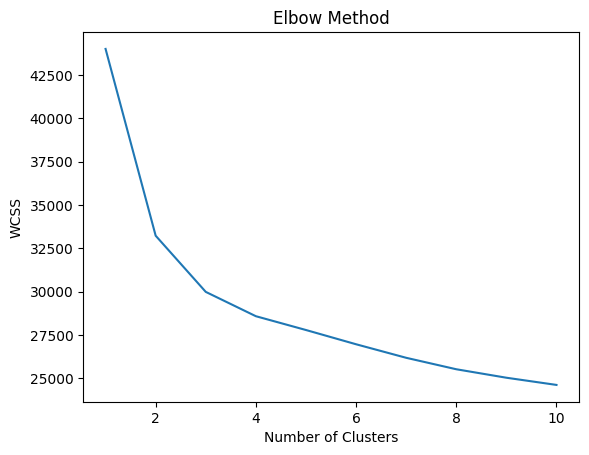

         MntGoldProds    MntWines  NumWebVisitsMonth  MntSweetProducts  \
Cluster                                                                  
0           65.186691  524.617375           5.722736         23.556377   
1           77.137457  582.948454           2.792096         71.579038   
2           18.411248   35.833040           6.954306          6.739895   
3           14.549270   68.125912           5.895985          4.348540   

               Income  MntMeatProducts  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                      
0        59623.515888       147.208872           3.719039         6.556377   
1        76797.750433       454.357388           1.305842         5.201031   
2        29703.968085        28.008787           1.927944         2.316344   
3        42251.829630        25.465328           2.443431         2.295620   

         Teenhome  MntFruits  NumCatalogPurchases  NumStorePurchases  \
Cluster       

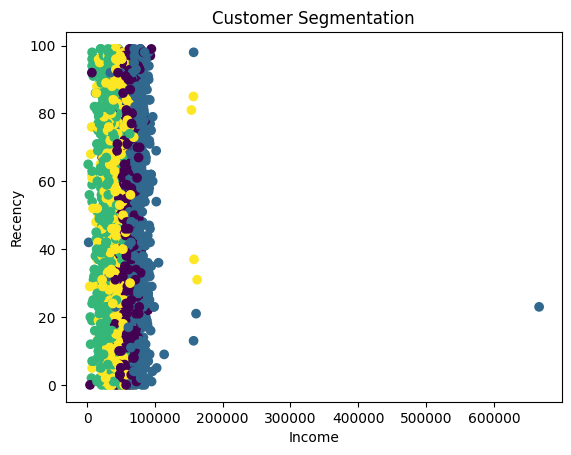

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

# Select relevant features for Customer Personality Analysis
features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response']
X = data[features]

# Preprocess data
# 1. Handle categorical features with one-hot encoding
categorical_features = ['Education', 'Marital_Status', 'Dt_Customer', 'Response']
numerical_features = list(set(features) - set(categorical_features))

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing numerical values with the mean
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # sparse=False for KMeans
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_preprocessed)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., 4 based on the elbow curve)
optimal_k = 4

# Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_preprocessed)

# Analyze and interpret the clusters
# Calculate the means for only numerical features
cluster_means = data.groupby('Cluster')[numerical_features].mean()
print(cluster_means)


# Visualize the clusters (example - 2D scatter plot)
# Choose two features for visualization (e.g., Income and Recency)
plt.scatter(data['Income'], data['Recency'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Recency')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Load dataset from the specified path
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Preprocess data
# Convert categorical features to numerical using one-hot encoding
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Forecasting: Predict attrition for new employees (example)
new_employee_data = pd.DataFrame([{'Age': 30, 'DailyRate': 800, 'DistanceFromHome': 10,  # ... add other features
                                  'EnvironmentSatisfaction': 4, 'JobInvolvement': 3, 'JobLevel': 2,  # ...
                                  'JobSatisfaction': 4, 'MonthlyIncome': 6000, 'NumCompaniesWorked': 2,  # ...
                                  'PercentSalaryHike': 15, 'PerformanceRating': 3, 'RelationshipSatisfaction': 4,  # ...
                                  'StockOptionLevel': 1, 'TotalWorkingYears': 8, 'TrainingTimesLastYear': 2,  # ...
                                  'WorkLifeBalance': 3, 'YearsAtCompany': 5, 'YearsInCurrentRole': 3,  # ...
                                  'YearsSinceLastPromotion': 2, 'YearsWithCurrManager': 3, # ...
                                  'BusinessTravel': 'Travel_Rarely',  # Include categorical features directly with values
                                  'Department': 'Research & Development',
                                  'EducationField': 'Life Sciences',
                                  'Gender': 'Male',
                                  'JobRole': 'Sales Executive',
                                  'MaritalStatus': 'Single',
                                  'Over18': 'Y',
                                  'OverTime': 'Yes'
                                 }])

# Preprocess the new employee data (one-hot encoding)
# Use the same categorical features and encoding as during training
new_employee_data = pd.get_dummies(new_employee_data, columns=categorical_features, drop_first=True)

# Ensure all columns in X_train are present in new_employee_data
# Add missing columns with 0 values
missing_cols = set(X_train.columns) - set(new_employee_data.columns)
for col in missing_cols:
    new_employee_data[col] = 0

# Ensure the order of columns matches X_train
new_employee_data = new_employee_data[X_train.columns]

# Make prediction for the new employee
attrition_prediction = model.predict(new_employee_data)

# Print the prediction
print("Attrition Prediction:", attrition_prediction)

              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

Accuracy: 0.8775510204081632
Attrition Prediction: ['No']


In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/creditcard.csv")

# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [29]:
!pip install -U imbalanced-learn


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset, specifying the error_bad_lines parameter
# This will skip any lines that cause errors during parsing
data = pd.read_csv("creditcard.csv", on_bad_lines='skip')
# Alternatively, to replace the bad lines with NaN values, use:
# data = pd.read_csv("creditcard.csv", on_bad_lines='warn')

# Step 1: Separate features and labels
X = data.drop(columns=['Class'])
y = data['Class']

# *** Handle NaN values in 'y' (target variable) before splitting ***
# Drop rows with NaN values in 'y'
X = X[~y.isnull()]  # Keep rows in X where 'y' is not NaN
y = y.dropna()    # Drop NaN values from 'y'

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Scale the features (especially 'Amount' and 'Time')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply SMOTE to the training set to handle the class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

<ipython-input-33-ee01ae8dc0b0>:10: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("creditcard.csv", on_bad_lines='skip')


Accuracy: 0.999442015122529
Confusion Matrix:
[[87643    23]
 [   26   124]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     87666
         1.0       0.84      0.83      0.84       150

    accuracy                           1.00     87816
   macro avg       0.92      0.91      0.92     87816
weighted avg       1.00      1.00      1.00     87816



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("creditcard.csv", on_bad_lines='skip')

# Step 1: Separate features and labels
X = data.drop(columns=['Class'])
y = data['Class']

# Handle NaN values in 'y' (target variable) before splitting
X = X[~y.isnull()]
y = y.dropna()

# Step 2: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 5: Train the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# *** Fraud Detection: Identify fraudulent transactions ***
# Add the predictions to the original test data
X_test['Fraud_Prediction'] = y_pred

# Filter out the transactions predicted as fraudulent (Class 1)
fraudulent_transactions = X_test[X_test['Fraud_Prediction'] == 1]

# Print or save the fraudulent transactions
print("\nFraudulent Transactions:")
print(fraudulent_transactions)  # You can save this to a CSV file if needed

<ipython-input-34-de636595e8c5>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("creditcard.csv", on_bad_lines='skip')


Accuracy: 0.999442015122529
Confusion Matrix:
[[87643    23]
 [   26   124]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     87666
         1.0       0.84      0.83      0.84       150

    accuracy                           1.00     87816
   macro avg       0.92      0.91      0.92     87816
weighted avg       1.00      1.00      1.00     87816


Fraudulent Transactions:
            Time        V1                V2         V3        V4        V5  \
151251   85285.0 -6.713407          3.921104  -9.746678  5.148263 -5.151563   
155490   88702.0  1.876620          1.074007  -1.795692  4.185851  1.096245   
69703    49985.0 -1.554216          1.694229  -0.903334  2.425436 -2.899787   
158576   93853.0 -6.185857          7.102985 -13.030455  8.010823 -7.885237   
207812  133184.0 -1.212682         -2.484824  -6.397186  3.670562 -0.863375   
...          ...       ...               ...        ...       ...       .

In [38]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Step 2: Load the dataset (You will need to upload the dataset manually on Colab)
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'credit_risk_dataset.csv'
credit_risk_data = pd.read_csv('credit_risk_dataset.csv')

# Step 3: Data Preprocessing
# Drop rows with missing values
credit_risk_data.dropna(inplace=True)

# Encode categorical variables (person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file)
label_encoders = {}
for column in ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']:
    le = LabelEncoder()
    credit_risk_data[column] = le.fit_transform(credit_risk_data[column])
    label_encoders[column] = le

# Step 4: Define features and target variable
X = credit_risk_data.drop(columns=['loan_status'])  # Features
y = credit_risk_data['loan_status']  # Target (default status)

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train a logistic regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Step 7: Predict probabilities (risk scores) and calculate performance metrics
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1 (default)
y_pred = log_reg_model.predict(X_test_scaled)

# Step 8: Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"ROC AUC Score: {roc_auc}")
print("Classification Report:")
print(class_report)

# Step 9: Optionally, output risk scores for the test set
risk_scores = pd.DataFrame({
    'Risk Score (Probability of Default)': y_pred_proba
})
print(risk_scores.head())


Saving credit_risk_dataset.csv to credit_risk_dataset (1).csv
ROC AUC Score: 0.8487128495350336
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6731
           1       0.72      0.46      0.56      1861

    accuracy                           0.85      8592
   macro avg       0.79      0.71      0.74      8592
weighted avg       0.83      0.85      0.83      8592

   Risk Score (Probability of Default)
0                             0.111376
1                             0.148305
2                             0.270087
3                             0.204675
4                             0.049663


In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the dataset
data = pd.read_csv("/content/credit_risk_dataset.csv")

# Assuming the correct column name for risk is 'loan_status'
# Preprocess data
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# *** Convert categorical features to numerical using Label Encoding ***
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']  # Add other categorical columns if needed
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Handle missing values by imputing with the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities of default for all loans in the dataset
# predict_proba returns probabilities for both classes (0 and 1)
# we're interested in the probability of default (class 1)
default_probabilities = model.predict_proba(X)[:, 1]

# Add the default probabilities to the original dataframe
data['Default_Probability'] = default_probabilities

# Sort the dataframe by default probability in descending order
data_sorted = data.sort_values(by=['Default_Probability'], ascending=False)

# Display the top N loans with the highest default probabilities
N = 10  # Number of loans to display
print(data_sorted[['person_age', 'person_income', 'loan_amnt', 'loan_status', 'Default_Probability']].head(N))


       person_age  person_income  loan_amnt  loan_status  Default_Probability
12220          24          74000      35000            1             0.965134
36             22          48000      30000            1             0.962448
18804          27          27000      11500            1             0.958743
17842          31          73000      35000            1             0.957383
22             22          65000      34000            1             0.951609
19084          27          34000      14000            1             0.950550
5590           22          39000      25000            1             0.949819
28256          29          60000      25000            1             0.944310
23158          29          54000      25000            1             0.937681
523            23          56000      21600            1             0.933704


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
